# linear differential cryptanalysis

tutorial on **linear** cryptanalysis and **differential** cryptanalysis, the two most significant attacks applicable to symmetric-key block ciphers.

more resource

[A Tutorial on Linear and Differential Cryptanalysis](https://www.yuque.com/xjh2000/cipher-paper/rhoufp5noo8apsmo?singleDoc)


## Subsitution

The most fundamental property of an S-box is that it is a nonlinear mapping, i.e., the output bits cannot be represented as a linear operation on the input bits.

we chose one 4-bit sbox.

| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | A | B | C | D | E | F | 
| -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | 
| E | 4 | D | 1 | 2 | F | B | 8 | 3 | A | 6 | C | 5 | 9 | 0 | 7 | 


In [46]:
from gettext import find


sbox = list(
    [0xE, 0x4, 0xD, 0x1, 0x2, 0xF, 0xB, 0x8, 0x3, 0xA, 0x6, 0xC, 0x5, 0x9, 0x0, 0x7]
)

inv_sbox = [sbox.index(i) for i in range(16)]



print(sbox)
print(inv_sbox)



# involution sbox ?


for i in range(len(sbox)):
    if i != sbox[sbox[i]]:
        print(

            f"i = {i}, sbox[i] = {sbox[i]}, sbox[sbox[i]] = {sbox[sbox[i]]} sbox is not involution"
        )


        break


# inv_sbox right
for i in range(len(sbox)):
    if i != inv_sbox[sbox[i]]:
        print(f"i = {i}, inv_sbox[sbox[i]] = {inv_sbox[sbox[i]]} inv_sbox is not right")
        break

[14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7]
[14, 3, 4, 8, 1, 12, 10, 15, 7, 13, 9, 6, 11, 2, 0, 5]
i = 1, sbox[i] = 4, sbox[sbox[i]] = 2 sbox is not involution


## Permutation
The permutation portion of a round is simply the tranposition of the bits or the permutation of the bit positions. 

| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 
| -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | 
| 1 | 5 | 9 | 13 | 2 | 6 | 10 | 14 | 3 | 7 | 11 | 15 | 4 | 8 | 12 | 16 |

In [47]:
permutation = list([0, 4, 8, 12, 1, 5, 9, 13, 2, 6, 10, 14, 3, 7, 11, 15])
print(permutation)

# involution permutation ?
for i in range(len(permutation)):
    if i != permutation[permutation[i]]:
        print(
            f"i = {i}, permutation[i] = {permutation[i]}, permutation[permutation[i]] = {permutation[permutation[i]]} "
        )
        print("permutation is not involution")
        break

[0, 4, 8, 12, 1, 5, 9, 13, 2, 6, 10, 14, 3, 7, 11, 15]


## Cipher Structure

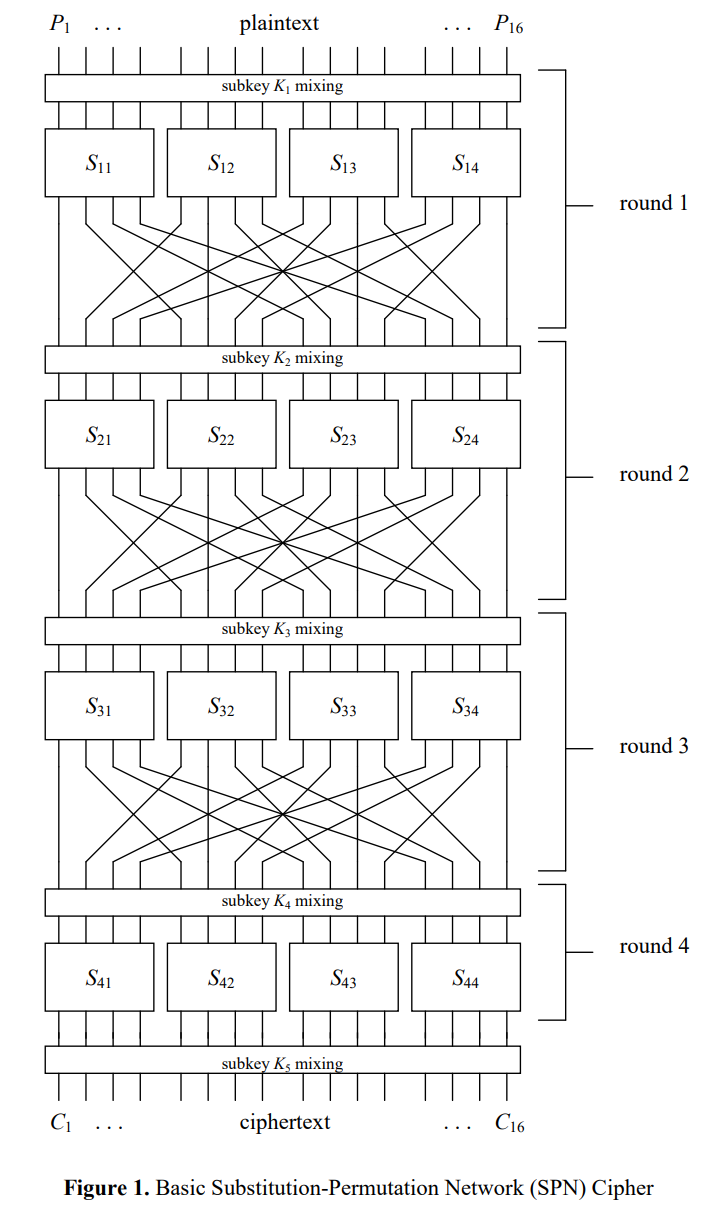

In [48]:
# add some tools function


def bin_to_int(bin_str):
    return int(bin_str, 2)


def int_to_bin(input_int, num_bits):
    # Convert the integer to binary and remove the '0b' prefix
    binary = bin(input_int)[2:]

    # Pad the binary number with zeros on the left if necessary
    binary = binary.zfill(num_bits)

    # Convert the binary string to a list of bits
    return list(map(int, binary))


def permute(input, permutation_table):
    # Create a new string with the same length as the permutation table
    output = [0] * len(permutation_table)

    # For each bit in the input
    for i in range(len(permutation_table)):
        # Move the bit at the position specified in the permutation table
        output[i] = input[permutation_table[i]]

    return output

In [49]:
def encrypt(
    plaintext: list, key1: list, key2: list, key3: list, key4: list, key5: list
):
    state = plaintext

    # round 1
    # add key
    state = [state[i] ^ key1[i] for i in range(len(state))]
    # subsitute
    state = [sbox[state[i]] for i in range(len(state))]
    # bit permutation
    # Please be aware that this operation may take a significant amount of time to complete.
    # This is due to the fact that Python does not natively support bit-level operations.
    state_b = [item for i in range(len(state)) for item in int_to_bin(state[i], 4)]
    state_b = permute(state_b, permutation)
    state = [
        bin_to_int("".join([str(state_b[i]) for i in range(j * 4, (j + 1) * 4)]))
        for j in range(4)
    ]
    # round 2
    state = [state[i] ^ key2[i] for i in range(len(state))]
    state = [sbox[state[i]] for i in range(len(state))]
    state_b = [item for i in range(len(state)) for item in int_to_bin(state[i], 4)]
    state_b = permute(state_b, permutation)
    state = [
        bin_to_int("".join([str(state_b[i]) for i in range(j * 4, (j + 1) * 4)]))
        for j in range(4)
    ]
    # round 3
    state = [state[i] ^ key3[i] for i in range(len(state))]
    state = [sbox[state[i]] for i in range(len(state))]
    state_b = [item for i in range(len(state)) for item in int_to_bin(state[i], 4)]
    state_b = permute(state_b, permutation)
    state = [
        bin_to_int("".join([str(state_b[i]) for i in range(j * 4, (j + 1) * 4)]))
        for j in range(4)
    ]

    # round 4
    state = [state[i] ^ key4[i] for i in range(len(state))]
    state = [sbox[state[i]] for i in range(len(state))]
    # add key5 at last, avoid last round sbox backward through
    state = [state[i] ^ key5[i] for i in range(len(state))]
    return state

## Linear analysis

we could get high probility path by the sbox.
- computer the Linear Approximation Table(LAT)

| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | A | B | C | D | E | F | 
| -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | 
| E | 4 | D | 1 | 2 | F | B | 8 | 3 | A | 6 | C | 5 | 9 | 0 | 7 | 

In [50]:
from functools import reduce


def LAT(sbox: list):
    """Linear Approximation Table

    Args: sbox (list)
    Returns: LAT (list)
    Note: The LAT is a 16*16 matrix, each row and column represents the input and output mask respectively. This support 4-bit sbox only.
    """
    LAT = [[0 for i in range(16)] for j in range(16)]
    LAT[0][0] = 8
    for input in range(1, 16):
        for output in range(1, 16):
            # input mask
            sum_input = int_to_bin(input, 4)
            # output mask
            sum_output = int_to_bin(output, 4)
            # count of linear equation satisfied
            equation_count = 0
            for i in range(16):
                sbox_input = int_to_bin(i, 4)
                sbox_output = int_to_bin(sbox[i], 4)
                temp1 = list(map(lambda a: a[0] & a[1], zip(sbox_input, sum_input)))
                temp2 = list(map(lambda a: a[0] & a[1], zip(sbox_output, sum_output)))
                if reduce(lambda x, y: x ^ y, temp1) == reduce(
                    lambda x, y: x ^ y, temp2
                ):
                    equation_count += 1
            LAT[input][output] = equation_count - 8

    return LAT


lat = LAT(sbox)
for i in range(16):
    print(lat[i])
# LAT

[8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, -2, -2, 0, 0, -2, 6, 2, 2, 0, 0, 2, 2, 0, 0]
[0, 0, -2, -2, 0, 0, -2, -2, 0, 0, 2, 2, 0, 0, -6, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 2, -6, -2, -2, 2, 2, -2, -2]
[0, 2, 0, -2, -2, -4, -2, 0, 0, -2, 0, 2, 2, -4, 2, 0]
[0, -2, -2, 0, -2, 0, 4, 2, -2, 0, -4, 2, 0, -2, -2, 0]
[0, 2, -2, 4, 2, 0, 0, 2, 0, -2, 2, 4, -2, 0, 0, -2]
[0, -2, 0, 2, 2, -4, 2, 0, -2, 0, 2, 0, 4, 2, 0, 2]
[0, 0, 0, 0, 0, 0, 0, 0, -2, 2, 2, -2, 2, -2, -2, -6]
[0, 0, -2, -2, 0, 0, -2, -2, -4, 0, -2, 2, 0, 4, 2, -2]
[0, 4, -2, 2, -4, 0, 2, -2, 2, 2, 0, 0, 2, 2, 0, 0]
[0, 4, 0, -4, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, -2, 4, -2, -2, 0, 2, 0, 2, 0, 2, 4, 0, 2, 0, -2]
[0, 2, 2, 0, -2, 4, 0, 2, -4, -2, 2, 0, 2, 0, 0, 2]
[0, 2, 2, 0, -2, -4, 0, 2, -2, 0, 0, -2, -4, 2, -2, 0]
[0, -2, -4, -2, -2, 0, 2, 0, 0, -2, 4, -2, -2, 0, 2, 0]


### Sample linear approximation

we get one expression of high probility 

$\varepsilon_{1,2,\cdots,n}=2^{n-1}\prod^{n}_{i=1}\varepsilon _i$

$|2^3(1/4)(-1/4)^3|=1/32$

$U_{4,6}\oplus U_{4,8}\oplus U_{4,14}\oplus U_{4,16} = P_{5}\oplus P_{7}\oplus P_{8}$
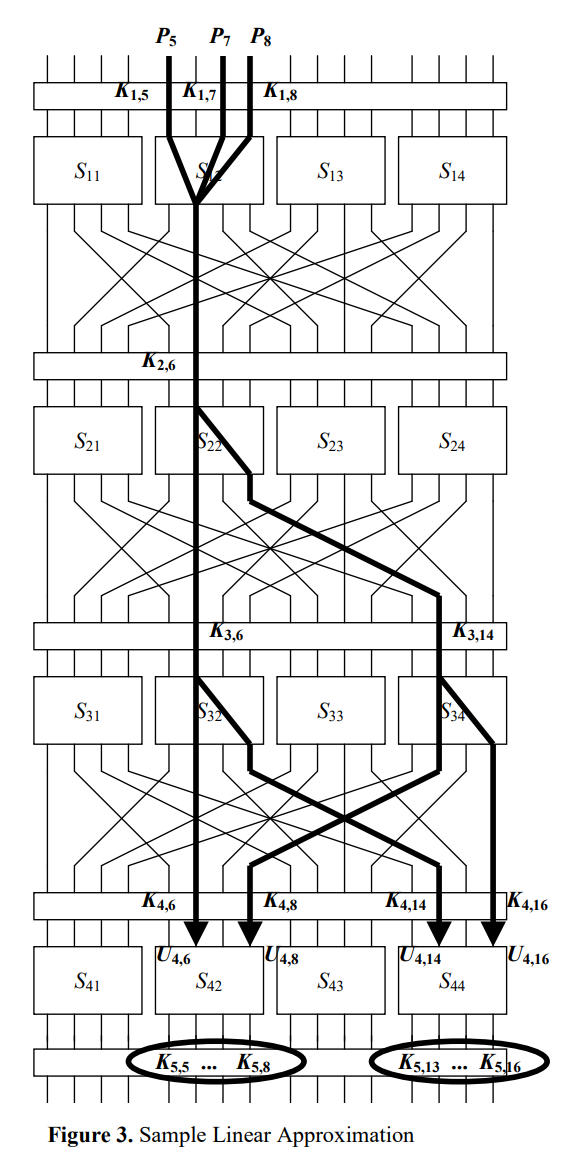


In [63]:
plaintext = [0x0, 0x0B, 0x0, 0x0]
key1 = [0x0, 0x0, 0x0, 0x0]
key2 = [0x0, 0x0, 0x0, 0x0]
key3 = [0x0, 0x0, 0x0, 0x0]
key4 = [0x0, 0x0, 0x0, 0x0]
key5 = [0x0, 0x9, 0x0, 0x6]
ciphertext = encrypt(plaintext, key1, key2, key3, key4, key5)
guessKey = [0x2, 0x4]


def is_linear_expression(plaintext: list, ciphertext: list, guessKey: list):
    # V42 is Sbox S42 input, U42 is Sbox S42 output
    V42 = ciphertext[1] ^ guessKey[0]
    V44 = ciphertext[3] ^ guessKey[1]
    U42 = inv_sbox[V42]
    U44 = inv_sbox[V44]
    U42_b = int_to_bin(U42, 4)
    U44_b = int_to_bin(U44, 4)
    P2_b = int_to_bin(plaintext[1], 4)
    # linear expression
    return U42_b[1] ^ U42_b[3] ^ U44_b[1] ^ U44_b[3] ^ P2_b[0] ^ P2_b[2] ^ P2_b[3]

is_linear_expression(plaintext, ciphertext, guessKey)

1

In [64]:
import random

# Generate 10000 random plaintexts
plaintexts = [[random.randint(0, 0xF) for _ in range(4)] for _ in range(10000)]

# Generate 10000 ciphertexts use the same key
ciphertexts = [
    encrypt(plaintexts[i], key1, key2, key3, key4, key5) for i in range(10000)
]


In [65]:
# count of linear expression satisfied
counts = [[0 for _ in range(16)] for _ in range(16)]
for i in range(10000):
    for j in range(16):
        for k in range(16):
            if is_linear_expression(plaintexts[i], ciphertexts[i], [j, k]):
                counts[j][k] += 1


In [66]:
# get the most bias of 5000 counts index
import numpy as np

counts = np.array(counts)

probility = np.abs(counts - 5000) / 10000

# Find the index of the maximum count
index = np.unravel_index(np.argmax(probility, axis=None), probility.shape)

print(index)  # Output: (x, y) index of the most biased count

(9, 6)


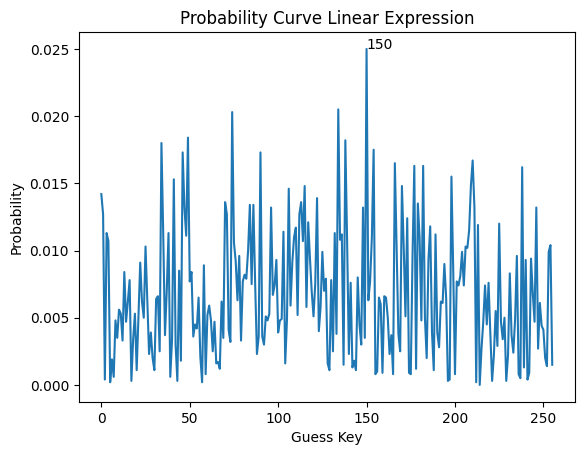

In [67]:
import matplotlib.pyplot as plt

flat_probility = probility.flatten()

# Find the index of the maximum probability
max_index = np.argmax(flat_probility)

plt.plot(flat_probility)
plt.xlabel('Guess Key')
plt.ylabel('Probability')
plt.title('Probability Curve Linear Expression')

# Annotate the maximum point
plt.annotate(f'{max_index}', xy=(float(max_index), flat_probility[max_index]), xytext=(float(max_index), flat_probility[max_index] ))

plt.show()


## Different analysis

- computer the Difference Distribution Table (DDT)

| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | A | B | C | D | E | F | 
| -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | 
| E | 4 | D | 1 | 2 | F | B | 8 | 3 | A | 6 | C | 5 | 9 | 0 | 7 | 


In [68]:
def DDT(sbox: list):
    DDT = [[0 for i in range(16)] for j in range(16)]
    DDT[0][0] = 16
    for input in range(0, 16):
        for input_delta in range(1, 16):
            output = sbox[input]
            output_delta = sbox[input ^ input_delta] ^ output
            DDT[input_delta][output_delta] += 1
    return DDT

modiri_sbox = [0xc,0xa,0xd,0x3,0xe,0xb,0xf,0x7,0x8,0x9,0x1,0x5,0x0,0x2,0x4,0x6]
ddt = DDT(modiri_sbox)

for i in range(16):
    print(ddt[i])

[16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 2, 4, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0]
[0, 4, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0]
[0, 0, 0, 0, 2, 0, 4, 2, 2, 2, 0, 0, 0, 2, 0, 2]
[0, 2, 4, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0]
[0, 2, 0, 0, 2, 0, 0, 4, 0, 2, 4, 0, 2, 0, 0, 0]
[0, 2, 0, 4, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2]
[0, 0, 0, 2, 0, 4, 2, 0, 0, 0, 0, 2, 0, 4, 2, 0]
[0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0]
[0, 0, 4, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0]
[0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 4, 0, 4]
[0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 4, 0, 2, 0, 2]
[0, 0, 4, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0]
[0, 0, 0, 2, 0, 0, 2, 4, 0, 0, 4, 2, 0, 0, 2, 0]
[0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 4, 2]
[0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 4, 2, 0, 0, 2, 4]


### Sample different 
$\Delta P=[0000 1011 0000 0000]$
$\Delta U_4=[0000 0110 0000 0110]$

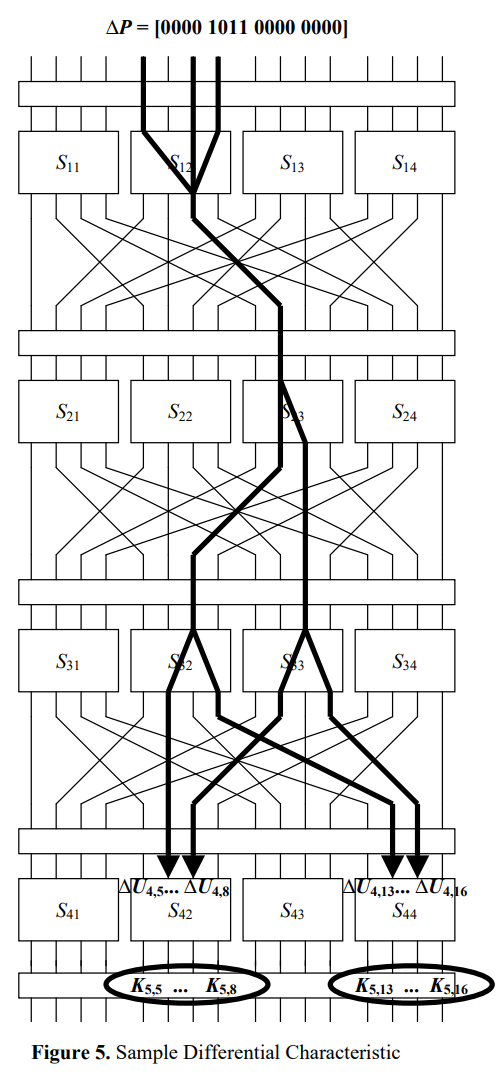


In [69]:

def is_different_expression(ciphertext: list, ciphertext_diff: list, guessKey: list):
    if ciphertext[0] ^ ciphertext_diff[0] != 0x0 and ciphertext[2] ^ ciphertext_diff[2] != 0x0:
        return False
    # V42 is Sbox S42 input, U42 is Sbox S42 output
    V42 = ciphertext[1] ^ guessKey[0]
    V44 = ciphertext[3] ^ guessKey[1]
    V42_diff = ciphertext_diff[1] ^ guessKey[0]
    V44_diff = ciphertext_diff[3] ^ guessKey[1]
    U42 = inv_sbox[V42]
    U44 = inv_sbox[V44]
    U42_diff = inv_sbox[V42_diff]
    U44_diff = inv_sbox[V44_diff]
    # different expression
    if (
       U42 ^ U42_diff == 0x6 and U44 ^ U44_diff == 0x6
    ):
        return True
    return False

In [70]:
import random

# Generate 10000 random plaintexts
plaintexts = [[random.randint(0, 0xF) for _ in range(4)] for _ in range(5000)]

plaintexts_diff = list(
    map(
        lambda plaintext: [
            plaintext[0],
            plaintext[1] ^ 0xB,
            plaintext[2],
            plaintext[3],
        ],
        plaintexts,
    )
)

# Generate 10000 ciphertexts use the same key
ciphertexts = [
    encrypt(plaintexts[i], key1, key2, key3, key4, key5) for i in range(5000)
]

ciphertexts_diff = [encrypt(plaintexts_diff[i], key1, key2, key3, key4, key5) for i in range(5000)]

In [71]:
counts = [[0 for _ in range(16)] for _ in range(16)]

for i in range(5000):
    for j in range(16):
        for k in range(16):
            if is_different_expression(ciphertexts[i], ciphertexts_diff[i], [j, k]):
                counts[j][k] += 1

In [72]:
import numpy as np

counts = np.array(counts)

probility = np.abs(counts ) / 5000

# Find the index of the maximum count
index = np.unravel_index(np.argmax(probility, axis=None), probility.shape)

print(index)  # Output: (x, y) index of the most biased count

(9, 6)


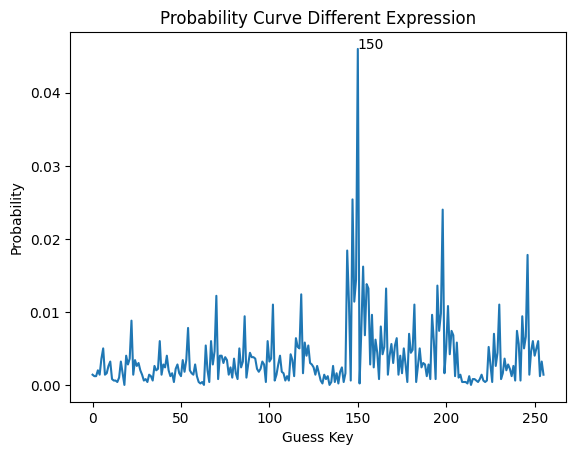

In [73]:
import matplotlib.pyplot as plt

flat_probility = probility.flatten()

# Find the index of the maximum probability
max_index = np.argmax(flat_probility)

plt.plot(flat_probility)
plt.xlabel('Guess Key')
plt.ylabel('Probability')
plt.title('Probability Curve Different Expression')

# Annotate the maximum point
plt.annotate(f'{max_index}', xy=(float(max_index), flat_probility[max_index]), xytext=(float(max_index), flat_probility[max_index] ))

plt.show()